In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

***
__Read Advertising Data Into Pandas DataFrame__
***

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


***
__Perform Ordinary Least Squares Fit on Sales vs TV data.__
***

In [3]:
result = smf.ols(formula='sales ~ TV', data=data).fit()

In [4]:
result.params

Intercept    7.032594
TV           0.047537
dtype: float64

***************
__Function for a line__
***************

In [5]:
line = lambda x,m,b: m*x + b  # m-slope, b-yintercept.

In [6]:
# yintercept (or b)
result.params.Intercept 

7.032593549127693

In [7]:
# slope (or m)
result.params.TV 

0.04753664043301975

In [8]:
# fit residuals:  Vertial offsets between the data and the model-predicted values.
# Vertical offsets means only the differences in the y-axis direction are considered in OLS method. 

residuals = np.asarray( result.resid )
print(residuals)

[ 4.12922549  1.25202595  1.44977624  4.26560543 -2.72721814 -0.24616232
  2.03404963  0.45350227 -2.64140866 -5.93041431 -1.57476548  0.16128975
  1.03603441 -1.96741599  2.26517814  6.07874691  2.24442223  3.99059583
  0.97787093  0.56525932  0.58540418 -5.81779199 -2.0600772  -2.38520856
 -0.29412625 -7.52997632  1.17442053 -2.54614092  0.04029031  0.11131964
  0.44392447 -0.49948025 -2.053155   -2.25832525 -2.08185004 -8.05149492
  5.67987712  4.11641941  1.01857725  3.62905243 -0.05876324  1.65342109
 -0.28935118 -3.96792445  0.27423678 -0.45625929 -0.6966302   4.76336641
 -3.03291826 -0.51279479 -5.13041431 -1.10527225  5.28047746  5.48721591
  0.67953101  7.21236867 -1.87961102 -0.30708398  6.74668265  1.35143631
 -1.47580381  4.74608231 -2.7081116   2.08539348  4.73535289 -1.01262174
  0.97000228 -0.25444756  0.58220801  4.9614628   1.80286134  0.14788333
  0.49342449 -2.18383482 -0.17691262  0.86403723 -1.43985116  1.43924128
 -1.98929141 -1.54684384  1.13560712 -6.13187992  0

In [9]:
# Since xdata and data['sales'] will be used OVER and OVER again, 
# we will just assign them to variables, xdata and ydata, since that's what they represent.

xdata = data['TV']  
ydata = data['sales']  


# X-ARRAY FOR FUTURE LINEAR FITS
xarr = np.linspace(min(xdata), max(xdata), 100)


***
## Begin Plotting
***

__The first plot is a simple representation of the data, the linear fit model, and the vertical offsets (residuals) between the data and the model. Vertical --> y-axis direction only!!__

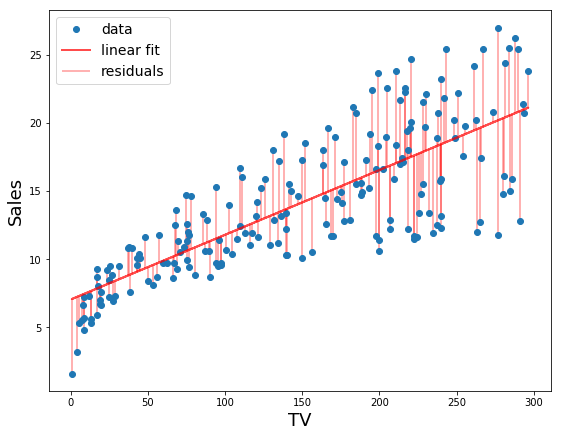

In [10]:
plt.figure(figsize=(9,7))
plt.plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
plt.plot(xdata, line(xdata, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# PLOT RESIDUALS -- VERTICAL OFFSETS
plt.vlines(xdata, ydata, line(xdata, result.params.TV, result.params.Intercept), 
           color='red', alpha=0.4, label='residuals') 
plt.ylabel('Sales', fontsize=18)
plt.xlabel('TV', fontsize=18)
plt.legend(loc='best', numpoints=1, fontsize=14)

__Plot the residuals below the main plot, showing their offset values from zero.__

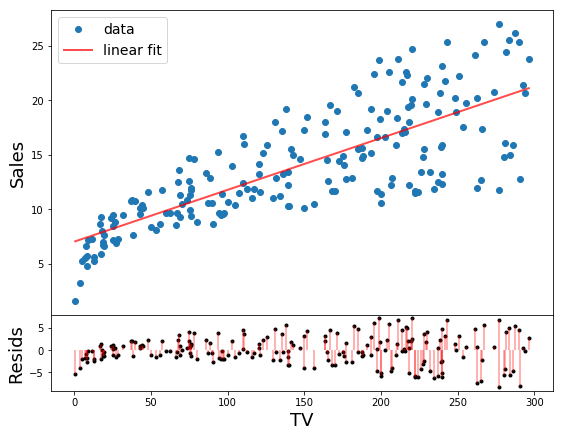

In [11]:
fig, ax = plt.subplots(2,1, figsize=(9,7), sharex=True, squeeze=True, 
                       gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
ax[0].plot(xarr, line(xarr, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# RESIDUALS FOR BOTTOM SUBPLOT
ax[1].scatter(xdata, residuals, marker='.', color='black')
ax[1].vlines(xdata, 0, residuals, color='red', alpha=0.4, label='residuals')
ax[0].set_ylabel('Sales', fontsize=18)
ax[1].set_xlabel('TV', fontsize=18)
ax[1].set_ylabel('Resids', fontsize=18)
ax[0].legend(loc='best', numpoints=1, fontsize=14)

## The whole point of this notebook...
The whole point of THIS specific notebook is to learn how to place a horizontal line across the residual (bottom) subplot at y=0 to better emphasize their offsets from zero. The most obvious way to do this is to use `plt.hlines(y, xmin, xmax)`, or `ax[1].hlines(y, xmin, xmax)` if you are using matplotlib subplots with multiple axes (*remember Python starts at 0, so ax[1] is techinially the second axes object*). 

The problem with using this method is that you _*must know*_ the x-axes limits. You could make a plot first without the horizonal line and then estimate the x-axis limits. For example, in the above plot we could estimate 0 and 300, or to exentend to the end of the plot, say -20 to 320.

However, if you plot the data first, then you can find the axes limits. Here are a few ways I will show you.

1. Use the maximum and minimum values of the x-data as `xmin` and `xmax` in `ax[1].hlines(y, xmin, xmax)`.
2. Do the same as #1, but instead, include a buffer of, say 5% of the data's range so the line extends past the data. This looks nicer, but requires axes limits to be set. 
3. Use the `plt.axhline` feature, which is the best option in my opinion!




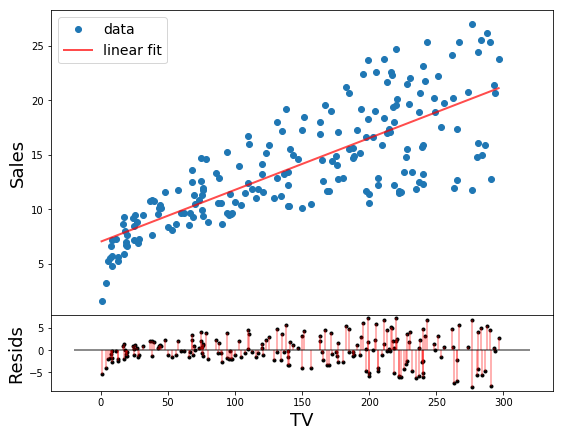

In [12]:
fig, ax = plt.subplots(2,1, figsize=(9,7), sharex=True, squeeze=True, 
                       gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
ax[0].plot(xarr, line(xarr, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# RESIDUALS FOR BOTTOM SUBPLOT
ax[1].scatter(xdata, residuals, marker='.', color='black')
ax[1].vlines(xdata, 0, residuals, color='red', alpha=0.4, label='residuals')


# HORIZONTAL LINE AT Y=0 ON RESIDUAL PLOT. 
ax[1].hlines(0, -20, 320, color='black', alpha=0.6) 


ax[0].set_ylabel('Sales', fontsize=18)
ax[1].set_xlabel('TV', fontsize=18)
ax[1].set_ylabel('Resids', fontsize=18)
ax[0].legend(loc='best', numpoints=1, fontsize=14)

__Matplotlib always applies a buffer region around the data, and this horizontal line is being treated the same way data would be treated. This is what is causing such a large gap at the edges of the x-axis. To fix this, we can apply x-axis limits.__

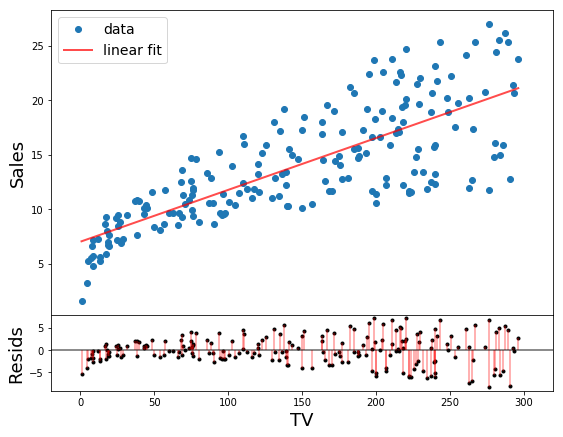

In [13]:
fig, ax = plt.subplots(2,1, figsize=(9,7), sharex=True, squeeze=True, 
                       gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
ax[0].plot(xarr, line(xarr, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# RESIDUALS FOR BOTTOM SUBPLOT
ax[1].scatter(xdata, residuals, marker='.', color='black')
ax[1].vlines(xdata, 0, residuals, color='red', alpha=0.4, label='residuals')


# HORIZONTAL LINE AT Y=0 ON RESIDUAL PLOT. 
ax[1].hlines(0, -20, 320, color='black', alpha=0.6) 
ax[1].set_xlim(-20, 320) # using subplots, xlimits are set with .set_xlim instead of .xlim


ax[0].set_ylabel('Sales', fontsize=18)
ax[1].set_xlabel('TV', fontsize=18)
ax[1].set_ylabel('Resids', fontsize=18)
ax[0].legend(loc='best', numpoints=1, fontsize=14)

In this plot we added `ax[1].set_xlim(-20, 320)` to impose limits on the x-axis of the residual plot. But, notice how BOTH plots adjusted to this axis limitation. This only happened because we used `plt.subplots(sharex=True)`, otherwise the default for `sharex` is `False` and then we would need to specifiy an x-axis limit for the top plot as well; `ax[0].set_xlim(-20, 320)`. For a plot like this one, where we show the data/model fit on a plot and the fit residuals just below it, it would never make sense to leave out `sharex=True` since both plots clearly share the same x-data. 


__This worked, but what if we want to automate the process and not have to choose x-axis limits by eye? We could use a buffer of say 5% the range of the x-data.__

In [14]:
# SET-UP X-DATA RANGE AND THE 5% BUFFER. SET UP THE XLIMS ACCORDING TO THOSE. 
xRange = max(xdata) - min(xdata)
xBuff = xRange * 0.05  # 5% buffer
xLims = min(xdata)-xBuff, max(xdata)+xBuff

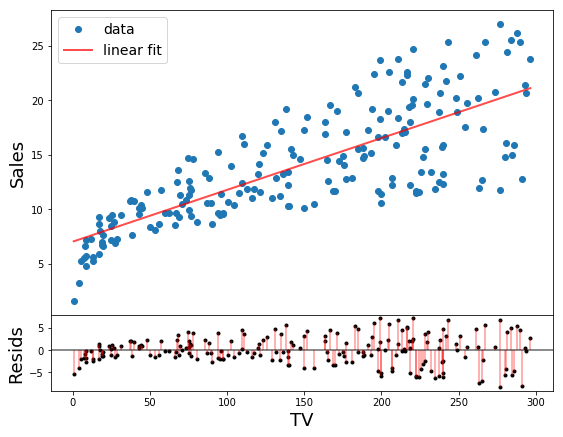

In [15]:
fig, ax = plt.subplots(2,1, figsize=(9,7), sharex=True, squeeze=True, 
                       gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
ax[0].plot(xarr, line(xarr, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# RESIDUALS FOR BOTTOM SUBPLOT
ax[1].scatter(xdata, residuals, marker='.', color='black')
ax[1].vlines(xdata, 0, residuals, color='red', alpha=0.4, label='residuals')


# HORIZONTAL LINE AT Y=0 ON RESIDUAL PLOT. 
ax[1].hlines(0, xLims[0], xLims[1], color='black', alpha=0.6) 
ax[1].set_xlim(xLims) # using subplots, xlimits are set with .set_xlim instead of .xlim


ax[0].set_ylabel('Sales', fontsize=18)
ax[1].set_xlabel('TV', fontsize=18)
ax[1].set_ylabel('Resids', fontsize=18)
ax[0].legend(loc='best', numpoints=1, fontsize=14)

__Again, this works, but it can be ugly when you run into data of varying sizes as it creates different gap sizes along the axes edges. Another option is to use `ax[1].axes.get_xlim()`. This will return the matplotlib determined x-axis edges. However, be careful not to set x-axes limits before using it or plot anything with arbitrarily determined boundaries (like hline with limits you choose). If you extend the axes with `ax[1].hlines(0, -20, 320)`, then this (-20, 320) is what you will get from `ax[1].axes.get_xlim()` instead of the one chosen by matplotlib.__

__We don't bother wasting time showing that using 
`ax[1].axes.get_xlim())` will give us `(-15.153688769414579, 312.2536887694145)`.
If you need proof, run the code below.__

__Using `ax[1].axes.get_xlim()`__

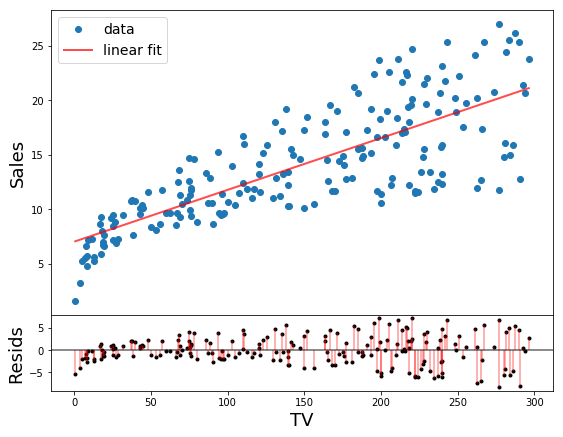

In [16]:
fig, ax = plt.subplots(2,1, figsize=(9,7), sharex=True, squeeze=True, 
                       gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
ax[0].plot(xarr, line(xarr, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# RESIDUALS FOR BOTTOM SUBPLOT
ax[1].scatter(xdata, residuals, marker='.', color='black')
ax[1].vlines(xdata, 0, residuals, color='red', alpha=0.4, label='residuals')


xLims = ax[1].axes.get_xlim()
# HORIZONTAL LINE AT Y=0 ON RESIDUAL PLOT. 
ax[1].hlines(0, xLims[0], xLims[1], color='black', alpha=0.6) 
ax[1].set_xlim(xLims) # using subplots, xlimits are set with .set_xlim instead of .xlim


ax[0].set_ylabel('Sales', fontsize=18)
ax[1].set_xlabel('TV', fontsize=18)
ax[1].set_ylabel('Resids', fontsize=18)
ax[0].legend(loc='best', numpoints=1, fontsize=14)

__Although this works, the absolute best way is to not have to impose x-axis limits at all. This can be done using `ax[1].axhline(0, 0, 1)`.__

?plt.axhline



```


Signature: plt.axhline(y=0, xmin=0, xmax=1, **kwargs)
Docstring:
Add a horizontal line across the axis.

Parameters
----------
y : scalar, optional, default: 0
    y position in data coordinates of the horizontal line.

xmin : scalar, optional, default: 0
    Should be between 0 and 1, 0 being the far left of the plot, 1 the
    far right of the plot.

xmax : scalar, optional, default: 1
    Should be between 0 and 1, 0 being the far left of the plot, 1 the
    far right of the plot.
```

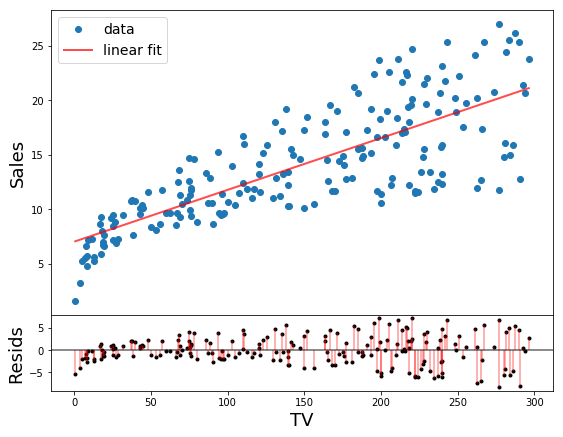

In [17]:
fig, ax = plt.subplots(2,1, figsize=(9,7), sharex=True, squeeze=True, 
                       gridspec_kw={'hspace':0, 'height_ratios':[4,1]})
ax[0].plot(xdata, ydata, marker='o', lw=0, label='data')
# LINEAR FIT
ax[0].plot(xarr, line(xarr, result.params.TV, result.params.Intercept), 
           lw=2, color='red', alpha=0.7, label='linear fit')
# RESIDUALS FOR BOTTOM SUBPLOT
ax[1].scatter(xdata, residuals, marker='.', color='black')
ax[1].vlines(xdata, 0, residuals, color='red', alpha=0.4, label='residuals')


# HORIZONTAL LINE AT Y=0 ON RESIDUAL PLOT. 
ax[1].axhline(0, 0, 1, color='black', alpha=0.6) 


ax[0].set_ylabel('Sales', fontsize=18)
ax[1].set_xlabel('TV', fontsize=18)
ax[1].set_ylabel('Resids', fontsize=18)
ax[0].legend(loc='best', numpoints=1, fontsize=14)